In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

###################################################################
# Generar datos de ejemplo para Regresión Logística

np.random.seed(100)
n_samples = 10000
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=311, cluster_std=1.6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=331)

###################################################################

model_rl = LogisticRegression()
model_rl.fit(X_train, y_train)

param_grid = {'solver': ['newton-cg', 'lbfgs'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
model_rl_hiper = GridSearchCV(LogisticRegression(), param_grid)
model_rl_hiper.fit(X_train, y_train)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

###################################################################

x_pred = np.array([[4, 4]])

y_rl_pred = model_rl.predict(x_pred)  # Predicción 1 Punto
y_rl_hiper_pred = model_rl_hiper.predict(x_pred)  # Predicción 1 Punto
y_knn_pred = model_knn.predict(x_pred)  # Predicción 1 Punto

y_train_rl_pred = model_rl.predict(X_train)  # Predicción Array Train
y_train_rl_hiper_pred = model_rl_hiper.predict(X_train)  # Predicción Array Train
y_train_knn_pred = model_knn.predict(X_train)  # Predicción Array Train

y_test_rl_pred = model_rl.predict(X_test)  # Predicción Array Test
y_test_rl_hiper_pred = model_rl_hiper.predict(X_test)  # Predicción Array Test
y_test_knn_pred = model_knn.predict(X_test)  # Predicción Array Test

###################################################################

print('Regresión: Logística / Logística con Hiperparámetros / KNN')
print()
print('Score Train :', model_rl.score(X_train, y_train), '/', model_rl_hiper.score(X_train, y_train), '/', model_knn.score(X_train, y_train))
print('Accuracy Score :', accuracy_score(y_train, y_train_rl_pred), '/', accuracy_score(y_train, y_train_rl_hiper_pred), '/', accuracy_score(y_train, y_train_knn_pred))
print('Precision Score :', precision_score(y_train, y_train_rl_pred), '/', precision_score(y_train, y_train_rl_hiper_pred), '/', precision_score(y_train, y_train_knn_pred))
print('Recall Score :', recall_score(y_train, y_train_rl_pred), '/', recall_score(y_train, y_train_rl_hiper_pred), '/', recall_score(y_train, y_train_knn_pred))
print('F1 Score :', f1_score(y_train, y_train_rl_pred), '/', f1_score(y_train, y_train_rl_hiper_pred), '/', f1_score(y_train, y_train_knn_pred))
print()
print('Score Test :', model_rl.score(X_test, y_test), '/', model_rl_hiper.score(X_test, y_test), '/', model_knn.score(X_test, y_test))
print('Accuracy Score :', accuracy_score(y_test, y_test_rl_pred), '/', accuracy_score(y_test, y_test_rl_hiper_pred), '/', accuracy_score(y_test, y_test_knn_pred))
print('Precision Score :', precision_score(y_test, y_test_rl_pred), '/', precision_score(y_test, y_test_rl_hiper_pred), '/', precision_score(y_test, y_test_knn_pred))
print('Recall Score :', recall_score(y_test, y_test_rl_pred), '/', recall_score(y_test, y_test_rl_hiper_pred), '/', recall_score(y_test, y_test_knn_pred))
print('F1 Score :', f1_score(y_test, y_test_rl_pred), '/', f1_score(y_test, y_test_rl_hiper_pred), '/', f1_score(y_test, y_test_knn_pred))
print()
print('Matriz de Confusión Logistic Regression:\n', confusion_matrix(y_test, y_test_rl_pred))
print('Matriz de Confusión Logistic Regression con Hiperparámetros:\n', confusion_matrix(y_test, y_test_rl_hiper_pred))
print('Matriz de Confusión KNN:\n', confusion_matrix(y_test, y_test_knn_pred))


Regresión: Logística / Logística con Hiperparámetros / KNN

Score Train : 0.9616 / 0.9618666666666666 / 0.9665333333333334
Accuracy Score : 0.9616 / 0.9618666666666666 / 0.9665333333333334
Precision Score : 0.9629333333333333 / 0.9622139435870144 / 0.9657552428988585
Recall Score : 0.9603723404255319 / 0.9617021276595744 / 0.9675531914893617
F1 Score : 0.9616511318242343 / 0.9619579675445598 / 0.9666533811611532

Score Test : 0.9656 / 0.9652 / 0.9576
Accuracy Score : 0.9656 / 0.9652 / 0.9576
Precision Score : 0.9706362153344209 / 0.9706122448979592 / 0.9624796084828712
Recall Score : 0.9596774193548387 / 0.9588709677419355 / 0.9516129032258065
F1 Score : 0.9651257096512571 / 0.9647058823529412 / 0.9570154095701541

Matriz de Confusión Logistic Regression:
 [[1224   36]
 [  50 1190]]
Matriz de Confusión Logistic Regression con Hiperparámetros:
 [[1224   36]
 [  51 1189]]
Matriz de Confusión KNN:
 [[1214   46]
 [  60 1180]]


Podemos observar algunos gráficos del modelo.

Los parámetros w0, w1 y w2, definen un plano z = w0 + w1.x1 + w2.x2, si queremos dibujar la recta de intersección de este plano con el plano xy, haremos z = 0 y al despejar, calcularemos los coeficientes a = -w1/w2 y b = -w0/w2

In [21]:
print('')
print('yˆ=w0+w1x+w2x2')
w0 = model_rl.intercept_
w1 = model_rl.coef_[0][0]
w2 = model_rl.coef_[0][1]
print('Ordenada en el origen (W0): ', w0)
print('Vector de coeficientes de la función lineal (W1 y W2): ', model_rl.coef_)


yˆ=w0+w1x+w2x2
Ordenada en el origen (W0):  [-4.11906288]
Vector de coeficientes de la función lineal (W1 y W2):  [[2.25016125 0.12121305]]


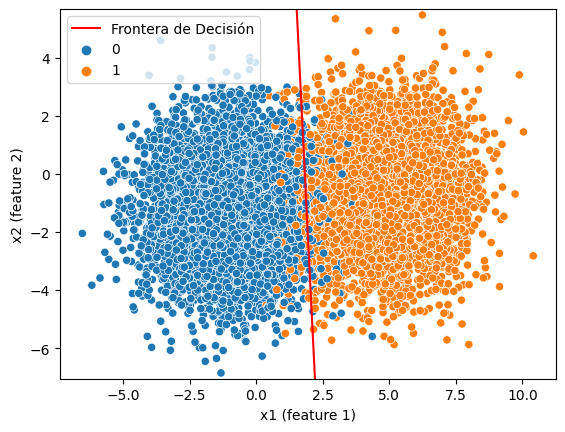

In [22]:
a = -w1/w2
b = -w0/w2

x_line=[X[:,0].min(),
        X[:,0].max()]

y_line=[a*X[:,0].min()+b[0],
        a*X[:,0].max()+b[0]]

#************************

sns.lineplot(x=x_line,
             y=y_line ,
             color='red',
            label='Frontera de Decisión')

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.ylim(top = X[:,1].max()+0.2, bottom = X[:,1].min()-0.2)
plt.legend(loc='best');


In [23]:
probabilidades = model_rl.predict_proba(X_test_rl)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


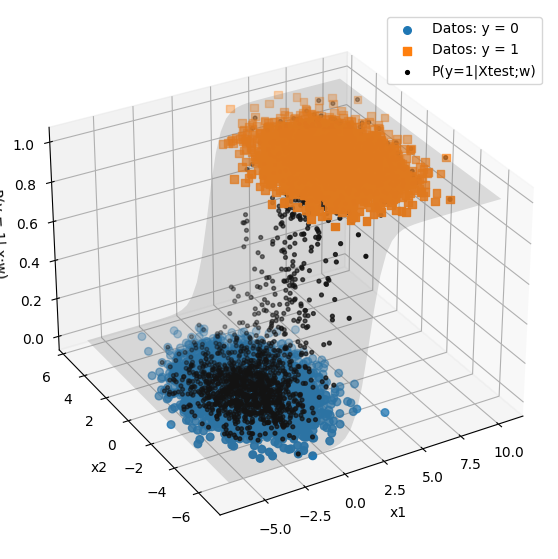

In [24]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface_prob = model_rl.predict_proba(X_surface)
y_pred_surface = y_pred_surface_prob[:, 1]

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(x_1_surf, x_2_surf, y_pred_surface.reshape(x_1_surf.shape),
                rstride=1000,
                cstride=1000,
                color='gray',
                alpha = 0.2)

ax.scatter(X[y == 0, 0], X[y == 0, 1], 0, c='tab:blue', s=30,
            label='Datos: y = 0', marker='o')
ax.scatter(X[y == 1, 0], X[y == 1, 1], 1, c='tab:orange', s=30,
            label='Datos: y = 1', marker='s')
ax.scatter(X_test_rl[:,0], X_test_rl[:,1], probabilidades[:,1], c='black', s=30,
            label='P(y=1|Xtest;w)', marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('P(y = 1| x;w)')
ax.view_init(30, 240)


plt.legend(loc='best')
plt.show()

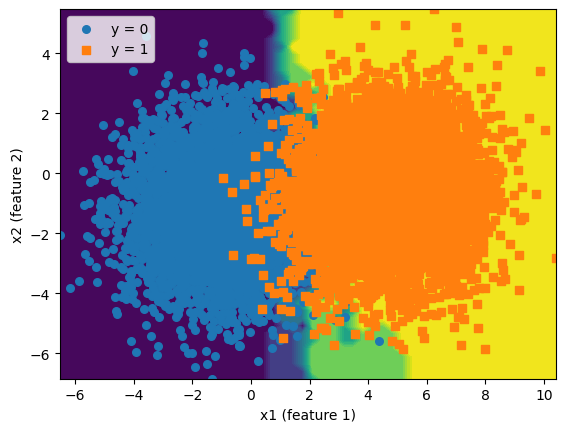

In [25]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface = model_knn.predict_proba(X_surface.values)[:, 1].reshape(x_1_surf.shape)


plt.contourf(x_1_surf, x_2_surf, y_pred_surface, 25,
                      vmin=0, vmax=1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='tab:blue', s=30,
            label='y = 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='tab:orange', s=30,
            label='y = 1', marker='s')
plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.legend(loc='best');